## **Overfitting using Tensorflow Keras**
In this scenario of hackerrank, you will be exploring about the **Overfitting** and how to overcome it.  

We will look at five scenarios here
1. With Overfitting, 
2. Overcoming Overfitting with Weight Constraints
3. Overcoming Overfittting with Early Stopping
4. Overcoming Overfitting with Dropouts
5. Overcoming Overfitting with Weight Decays

**Note** - Finally restart and run all the cells after the completion of the challenge


### Run the below cell to import the neccessary packages

In [1]:
from keras import backend as K
import numpy as np
import random as rn
import tensorflow as tf
import os
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import unit_norm
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.regularizers import l2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


### Run the below cells so as to get the reproducibility of the results

In [2]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
sd = 1 
np.random.seed(sd)
rn.seed(sd)
os.environ['PYTHONHASHSEED']=str(sd)

config = tf.ConfigProto(intra_op_parallelism_threads=1,inter_op_parallelism_threads=1)
tf.set_random_seed(sd)
sess = tf.Session(graph=tf.get_default_graph(), config=config)
K.set_session(sess)

### Load the dataset 
 - Load the make moons dataset using make_moons function with following parameters -
                  
                -n_samples as 100
                -noise as 0.2
                -random_state as sd

In [4]:
X, y = make_moons(n_samples = 100, noise = 0.2, random_state = sd)


### Split the Dataset
- Split the data by keeping first 30 data from the dataset as train dataset and remaining as tests dataset 

              -Assign n_train as 30 and split dataset as mentioned above and save it in variables trainX,testX,trainy and                     testy respectively

In [5]:
n_train = 30 
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

---------------------------------------------------------------------------
## **1.With OverFitting**
-------------------------------------------------------------------

### Create Model

Construct a fully-connected network structure defined using dense class in the function model
- Create a sequential model
- The model expects rows of data with 2 variables (the input_dim=2 argument)
- The hidden layer has 500 nodes and uses the relu activation function.
- The output layer has 1 node and uses the sigmoid activation function.
- While comipling the model pass the following parameters -
                    
           -optimizer as adam
           -loss as binary cross entropy 
           -metrics as accuracy

In [6]:
def model():
    model = Sequential()
    model.add(Dense(2, input_dim = 2))
    model.add(Dense(500, activation = "relu"))
    model.add(Dense(1, activation = "sigmoid"))
    
    model.compile(loss = "binary_crossentropy", 
             optimizer = "adam", 
             metrics = ["accuracy"])
    
    return model

### Fit the model
- Call the function model and save it in variable model
- Fit the model with trainX and trainy ,validation_data as testX and testy, epochs as 4000,verboseas 0 and save it in history1

In [7]:
model= model()
history1 = model.fit(trainX, trainy, validation_data= (testX, testy),epochs = 4000, verbose = 0)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


### Evaluate the model
- Evaluate the model with training data using trainX and trainy and give verbose as 0 and save it in train_acc

- In the similar way evaluate the model with test data using testX and testy using verbose as 0 and save it in test_acc

In [8]:
_, train_acc = model.evaluate(trainX, trainy, verbose = 0)
_, test_acc= model.evaluate(testX,testy, verbose = 0)
print('Train: %.2f, Test: %.2f' % (train_acc, test_acc))

Train: 1.00, Test: 0.93


### Run the below cell to look at the performance of the model

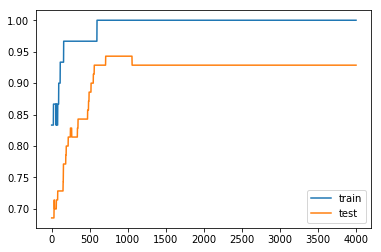

In [9]:
pyplot.plot(history1.history['accuracy'], label='train')
pyplot.plot(history1.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

---------------------------------------------------------------------------
## **2.Overcoming OverFitting with Weight Constraints**
-------------------------------------------------------------------

### Create Model

Construct a fully-connected network structure defined using dense class in the function model
- Create a sequential model
- The model expects rows of data with 2 variables (the input_dim=2 argument)
- The hidden layer has 500 nodes and uses the relu activation function and it has kernel_constraint as unit_norm.
- The output layer has 1 node and uses the sigmoid activation function.
- While comipling the model pass the following parameters -
                    
           -optimizer as adam
           -loss as binary cross entropy 
           -metrics as accuracy

In [10]:
def model1():
    model1 = Sequential()
    model1.add(Dense(2, input_dim = 2))
    model1.add(Dense(500, activation = "relu", kernel_constraint = "unit_norm"))
    model1.add(Dense(1, activation = "sigmoid"))
    
    model1.compile(loss = "binary_crossentropy", 
             optimizer = "adam", 
             metrics = ["accuracy"])
    
    
    
    
    return model1

### Fit the model
- Call the function model1 and save it in variable model1
- Fit the model1 with trainX and trainy ,validation_data as testX and testy, epochs as 4000,verbose as 0 and save it in history2

In [11]:
model1= model1()
history2 = model1.fit(trainX, trainy, validation_data= (testX, testy),epochs = 4000, verbose = 0)

### Evaluate the model
- Evaluate the model1 with training data using trainX and trainy and give verbose as 0 and save it in train_acc1.

- In the similar way evaluate the model1 with test data using testX and testy using verbose as 0 and save it in test_acc1.

In [12]:
_, train_acc1 = model1.evaluate(trainX, trainy, verbose = 0)
_, test_acc1= model1.evaluate(testX,testy, verbose = 0)
print('Train: %.2f, Test: %.2f' % (train_acc1, test_acc1))

Train: 1.00, Test: 0.94


### Run the below cell to look at the performance of the model

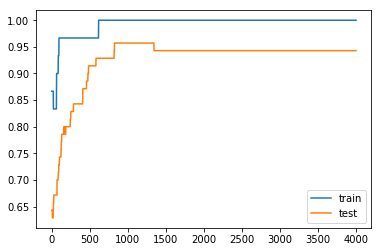

In [13]:
# plot history
pyplot.plot(history2.history['accuracy'], label='train')
pyplot.plot(history2.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

---------------------------------------------------------------------------
## **3.Overcoming OverFitting with Early Stopping**
-------------------------------------------------------------------

- Initiate Early Stopping using EarlyStopping function and pass the following parameters to it and save it in variable es -
        
        -monitor as val_loss
        -mode as min
        -verbose as 1
        patience as 500 

In [14]:
es = EarlyStopping(monitor = "val_loss", 
                  mode = "min", 
                  verbose = 1, 
                  patience = 500)

### Fit the model
- Fit the model1 with trainX and trainy ,validation_data as testX and testy, epochs as 4000,verbose as 0 ,callbacks as [es] and save it in history3

In [15]:
history3 = model1.fit(trainX, trainy, validation_data= (testX, testy),epochs = 4000, verbose = 0, callbacks = [es])

Epoch 00502: early stopping


### Evaluate the model
- Evaluate the model1 with training data using trainX and trainy and give verbose as 0 and save it in train_acc2.

- In the similar way evaluate the model1 with test data using testX and testy using verbose as 0 and save it in test_acc2.

In [16]:
_, train_acc2 = model1.evaluate(trainX, trainy, verbose = 0)
_, test_acc2= model1.evaluate(testX,testy, verbose = 0)
print('Train: %.2f, Test: %.2f' % (train_acc2, test_acc2))

Train: 1.00, Test: 0.94


### Run the below cell to look at the performance of the model

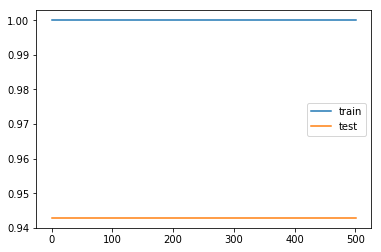

In [17]:
pyplot.plot(history3.history['accuracy'], label='train')
pyplot.plot(history3.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

---------------------------------------------------------------------------
## **4.Overcoming OverFitting with Dropouts**
-------------------------------------------------------------------

### Create Model

Construct a fully-connected network structure defined using dense class in the function model
- Create a sequential model
- The model expects rows of data with 2 variables (the input_dim=2 argument)
- The hidden layer has 500 nodes and uses the relu activation function.
- Add a dropout layer with dropout rate as 0.4
- The output layer has 1 node and uses the sigmoid activation function.
- While comipling the model pass the following parameters -
                    
           -optimizer as adam
           -loss as binary cross entropy 
           -metrics as accuracy

In [18]:
def model2():
    model2 = Sequential()
    model2.add(Dense(2, input_dim = 2))
    model2.add(Dense(500, activation = "relu"))
    model2.add(Dropout(0.4))
    model2.add(Dense(1, activation = "sigmoid"))
    
    model2.compile(loss = "binary_crossentropy", 
             optimizer = "adam", 
             metrics = ["accuracy"])    
    
    
    
    
    return model2

### Fit the model
- Call the function model2 and save it in variable model2
- Fit the model2 with trainX and trainy ,validation_data as testX and testy, epochs as 4000,verbose as 0 ,and save it in history4

In [19]:
model2= model2()
history4 = model2.fit(trainX, trainy, validation_data= (testX, testy),epochs = 4000, verbose = 0)

### Evaluate the model
- Evaluate the model2 with training data using trainX and trainy and give verbose as 0 and save it in train_acc3.

- In the similar way evaluate the model2 with test data using testX and testy using verbose as 0 and save it in test_acc3.

In [20]:
_, train_acc3 = model2.evaluate(trainX, trainy, verbose = 0)
_, test_acc3 = model2.evaluate(testX,testy, verbose = 0)
print('Train: %.2f, Test: %2f' % (train_acc3, test_acc3))

Train: 1.00, Test: 0.885714


### Run the below cell to look at the performance of the model

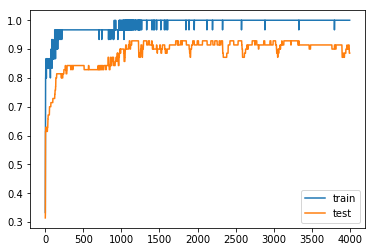

In [21]:
pyplot.plot(history4.history['accuracy'], label='train')
pyplot.plot(history4.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

---------------------------------------------------------------------------
## **5.Overcoming OverFitting with Weight Decays**
-------------------------------------------------------------------

### Create Model

Construct a fully-connected network structure defined using dense class in the function model
- Create a sequential model
- The model expects rows of data with 2 variables (the input_dim=2 argument)
- The hidden layer has 500 nodes and uses the relu activation function and it has kernal regulaizer as l2 with the rate as 0.01.
- The output layer has 1 node and uses the sigmoid activation function.
- While comipling the model pass the following parameters -
                    
           -optimizer as adam
           -loss as binary cross entropy 
           -metrics as accuracy

In [22]:
def model3():
    model3 = Sequential()
    model3.add(Dense(2, input_dim = 2))
    model3.add(Dense(500, activation = "relu", kernel_regularizer = l2(0.01)))
    model3.add(Dense(1, activation = "sigmoid"))
    
    model3.compile(loss = "binary_crossentropy", 
             optimizer = "adam", 
             metrics = ["accuracy"]) 
    
    
    

    
    return model3

### Fit the model
- Call the function model3 and save it in variable model3
- Fit the model3 with trainX and trainy ,validation_data as testX and testy, epochs as 4000,verbose as 0 ,and save it in history5

In [23]:
model3= model3()
history5 = model3.fit(trainX, trainy, validation_data= (testX, testy),epochs = 4000, verbose = 0)

### Evaluate the model
- Evaluate the model3 with training data using trainX and trainy and give verbose as 0 and save it in train_acc4.

- In the similar way evaluate the model3 with test data using testX and testy using verbose as 0 and save it in test_acc4.

In [24]:
_, train_acc4 = model3.evaluate(trainX, trainy, verbose = 0)
_, test_acc4 = model3.evaluate(testX,testy, verbose = 0)
print('Train: %.2f, Test: %.2f' % (train_acc4, test_acc4))

Train: 1.00, Test: 0.93


### Run the below cell to look at the performance of the model

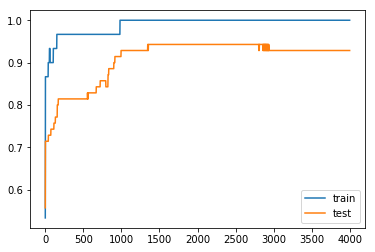

In [25]:
pyplot.plot(history5.history['accuracy'], label='train')
pyplot.plot(history5.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

### Run the below cell to plot the results

<Figure size 432x288 with 0 Axes>

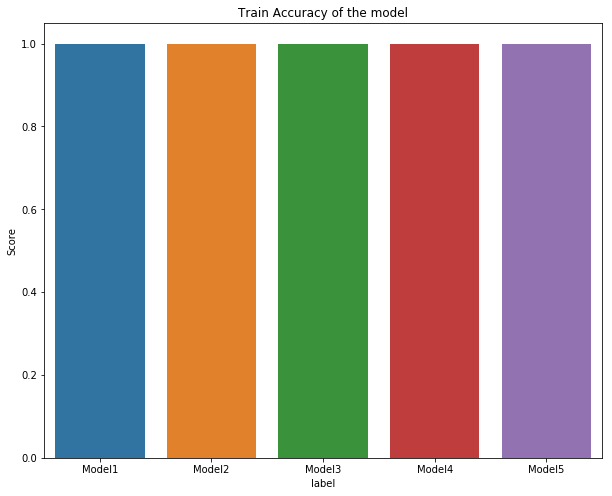

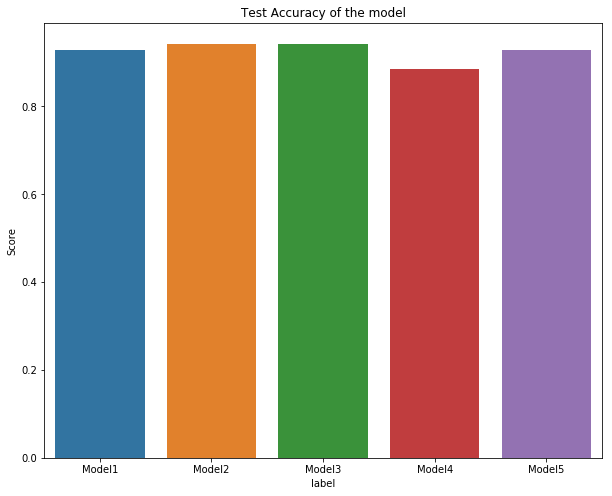

In [26]:
train_list=[train_acc,train_acc1,train_acc2,train_acc3,train_acc4]
test_list=[test_acc,test_acc1,test_acc2,test_acc3,test_acc4]

df=pd.DataFrame(train_list)

df["test_acc"]=test_list

df=df.rename(columns={0:"train_acc"})

df["label"]=["Model1","Model2","Model3","Model4","Model5"]
plt.figure(1)
pyplot.figure(figsize=(10,8))
#pyplot.xticks(grid_result1.cv_results_['mean_test_score'])
pyplot.title("Train Accuracy of the model")
plot1=sns.barplot(df["label"],df["train_acc"],order=df["label"])
plot1.set(ylabel='Score')
plt.figure(2)
pyplot.figure(figsize=(10,8))
#pyplot.xticks(grid_result1.cv_results_['mean_test_score'])
pyplot.title("Test Accuracy of the model")
plot2=sns.barplot(df["label"],df["test_acc"],order=df["label"])
plot2.set(ylabel='Score')
pyplot.show() 

**Note**

In the same way you can try using other weight constraints like max_norm, min_max_norm .

In the same way you can try exploring other weight decays (kernel regulaizers) like l1, l1 and l2 together.

### Run the below cell to save the models

In [27]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

# serialize model to JSON
model_json1 = model1.to_json()
with open("model1.json", "w") as json_file1:
    json_file1.write(model_json1)
# serialize weights to HDF5
model1.save_weights("model1.h5")

# serialize model to JSON
model_json2 = model2.to_json()
with open("model2.json", "w") as json_file2:
    json_file2.write(model_json2)
# serialize weights to HDF5
model2.save_weights("model2.h5")
# serialize model to JSON
model_json3 = model3.to_json()
with open("model3.json", "w") as json_file3:
    json_file3.write(model_json3)
# serialize weights to HDF5
model3.save_weights("model3.h5")

### Run the below cell to save the scores 

In [28]:
with open("train_acc1.txt","w") as f:
    f.write(str(round(train_acc,2)))
with open("test_acc1.txt","w") as f:
    f.write(str(round(test_acc,2)))

with open("train_acc2.txt","w") as f:
    f.write(str(round(train_acc1,2)))
with open("test_acc2.txt","w") as f:
    f.write(str(round(test_acc1,2)))
    
with open("train_acc3.txt","w") as f:
    f.write(str(round(train_acc2,2)))
with open("test_acc3.txt","w") as f:
    f.write(str(round(test_acc2,2)))
    
with open("train_acc4.txt","w") as f:
    f.write(str(round(train_acc3,2)))
with open("test_acc4.txt","w") as f:
    f.write(str(round(test_acc3,2)))

with open("train_acc5.txt","w") as f:
    f.write(str(round(train_acc4,2)))
with open("test_acc5.txt","w") as f:
    f.write(str(round(test_acc4,2)))

